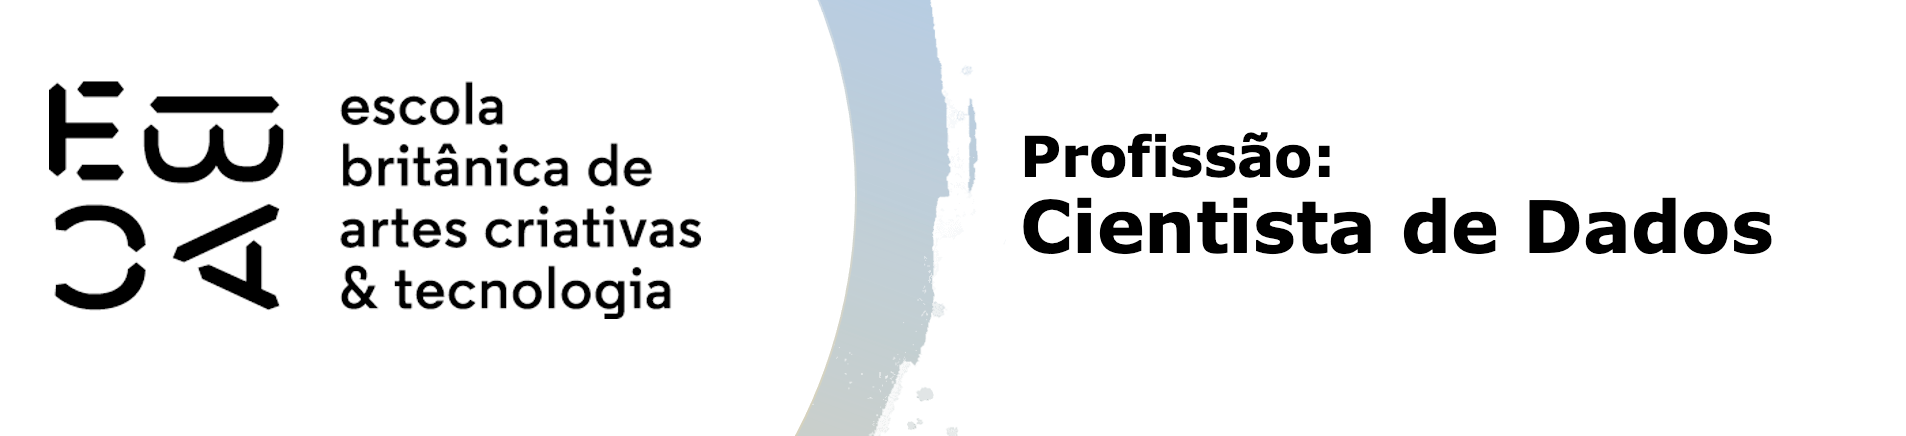

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [12]:
#Data minima
df.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [13]:
#Data maxima
df.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [14]:
# Retornando os ultimos 3 meses
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [15]:
print('número de linhas: {0}'.format(df.shape[0]))
date.value_counts()
df.data_ref.value_counts()

número de linhas: 750000


data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

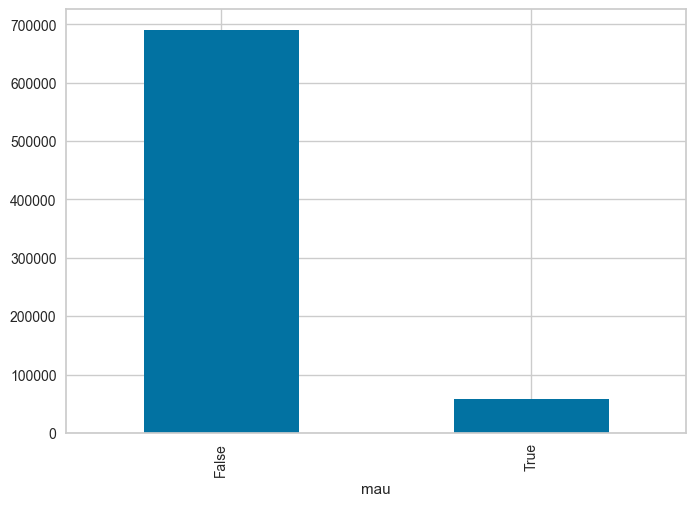

In [17]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

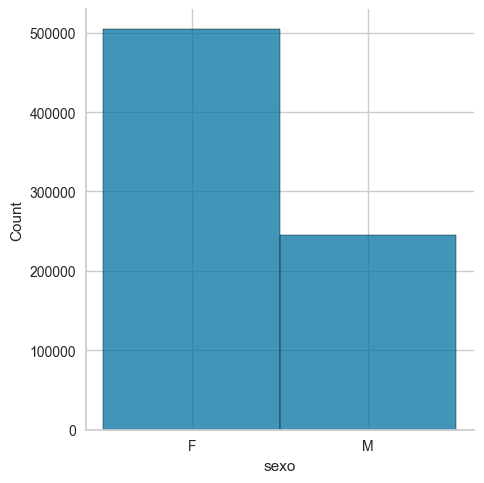

In [18]:
df.sexo.value_counts()
plt.clf()
var = "sexo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

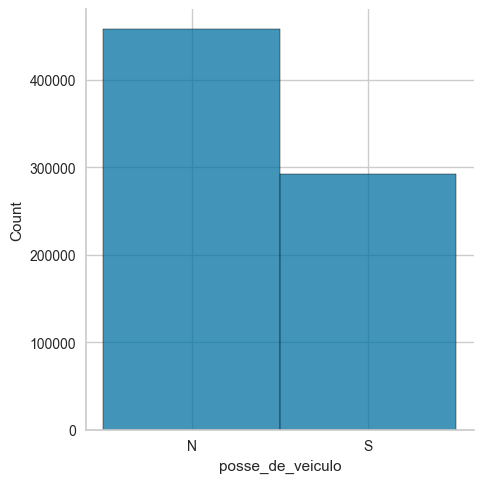

In [19]:
df.posse_de_veiculo.value_counts()
plt.clf()
var = "posse_de_veiculo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

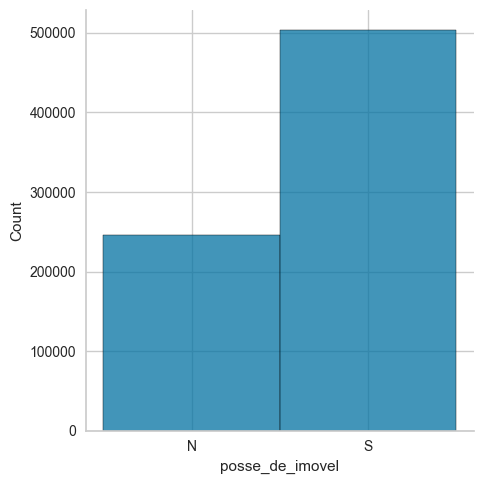

In [20]:
df.posse_de_imovel.value_counts()
plt.clf()
var = "posse_de_imovel"
sns.displot(df, x = var, bins = 50)
plt.show()

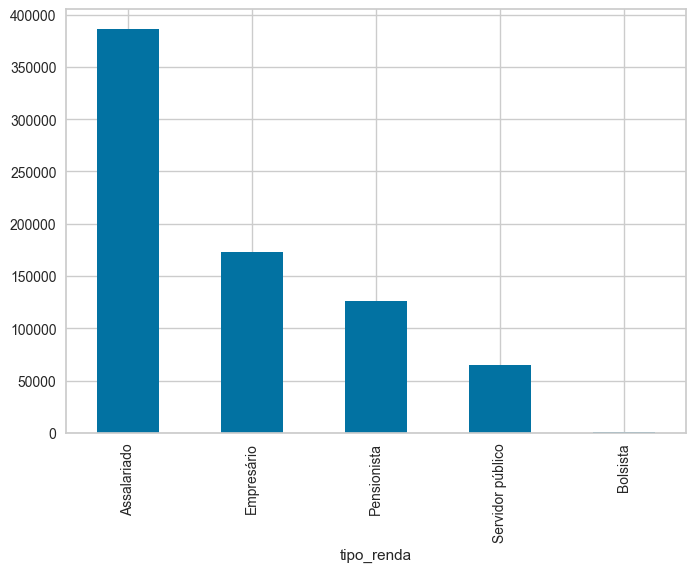

In [21]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

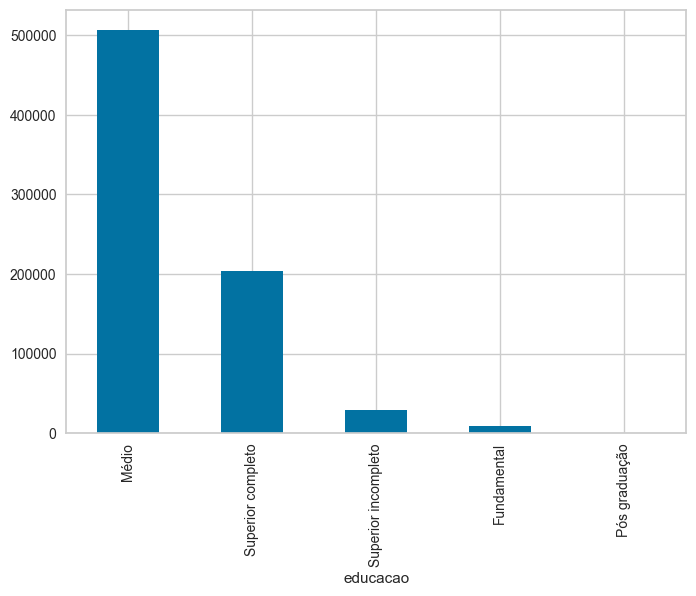

In [22]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

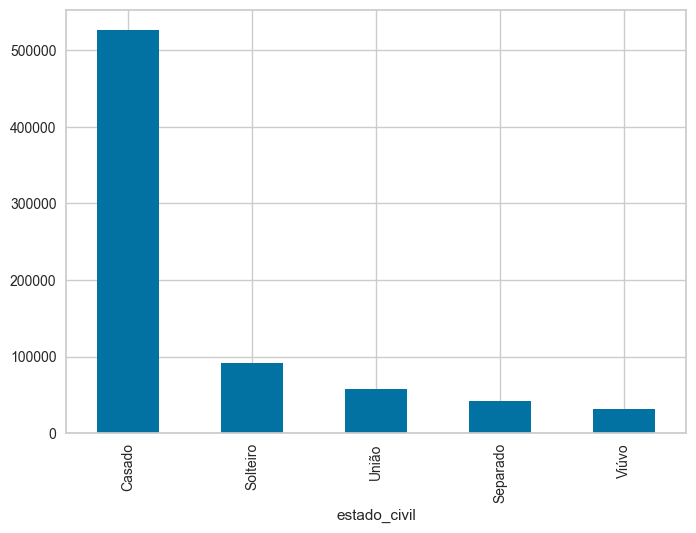

In [23]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

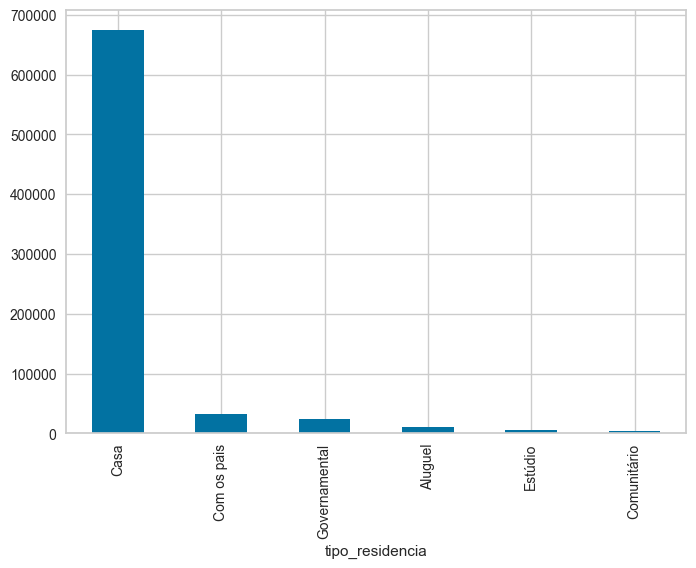

In [24]:

var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

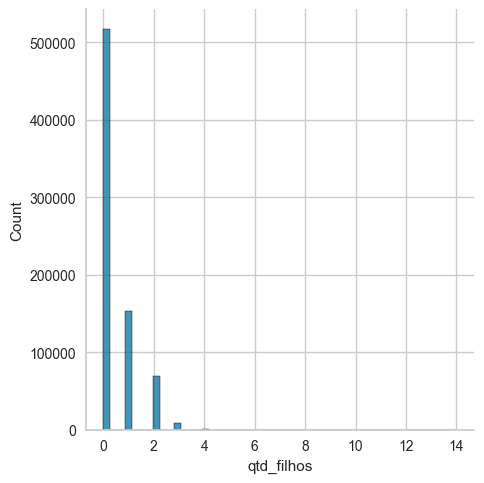

In [25]:
plt.clf()
var = "qtd_filhos"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

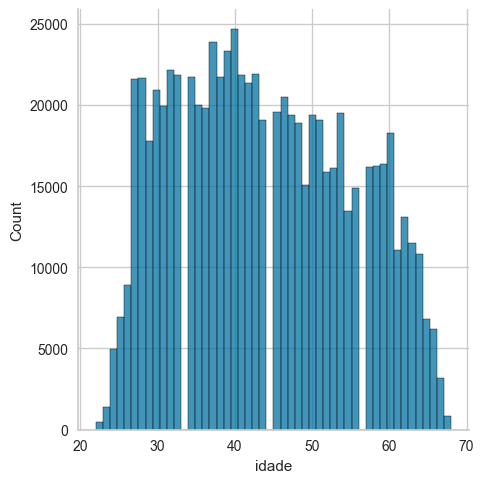

In [26]:

plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

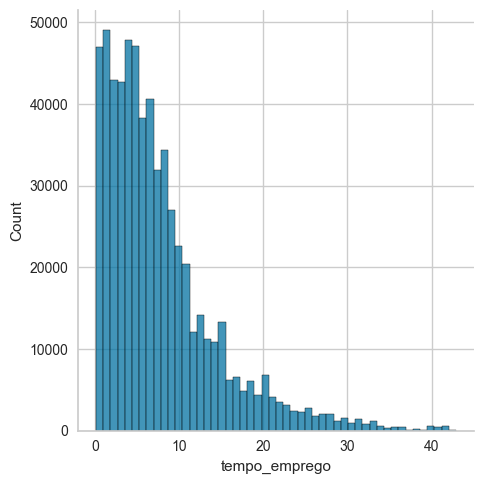

In [27]:

plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

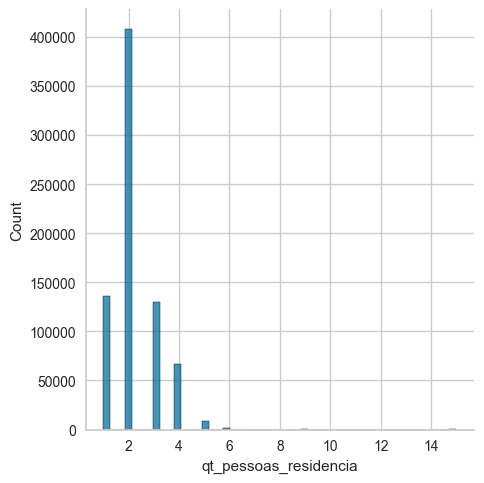

In [28]:
plt.clf()
var = "qt_pessoas_residencia"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

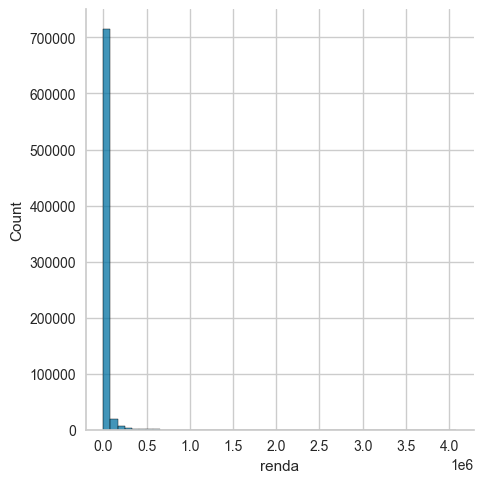

In [29]:

plt.clf()
var = "renda"
sns.displot(df, x = var, bins = 50)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

<Axes: xlabel='sexo', ylabel='mau'>

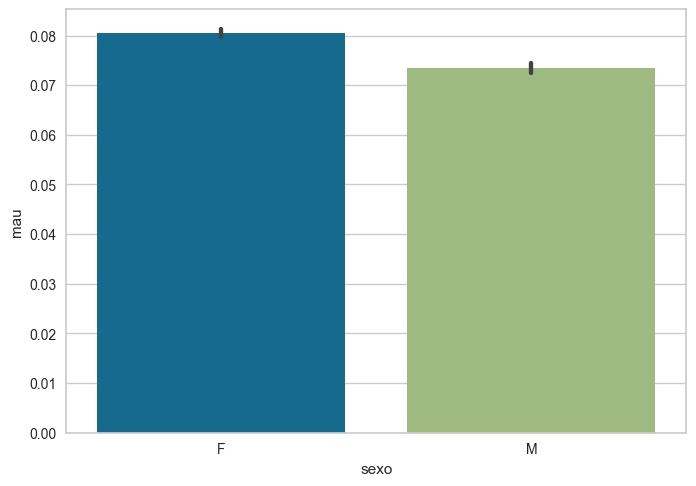

In [31]:
sns.barplot(x='sexo', y = 'mau', data=df)

<Axes: xlabel='posse_de_veiculo', ylabel='mau'>

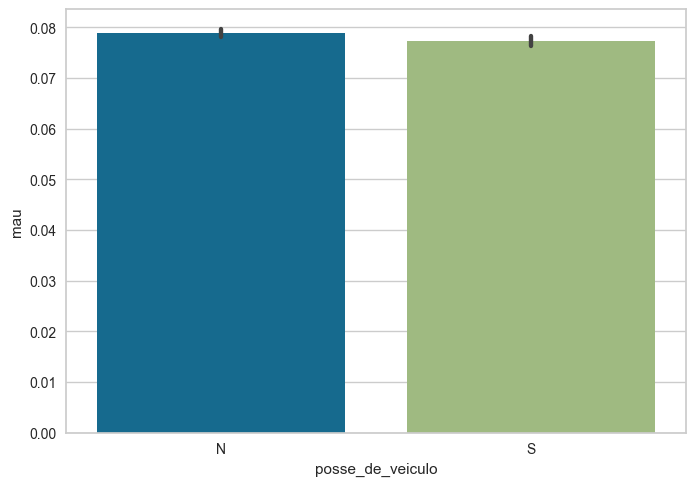

In [32]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=df)

<Axes: xlabel='posse_de_imovel', ylabel='mau'>

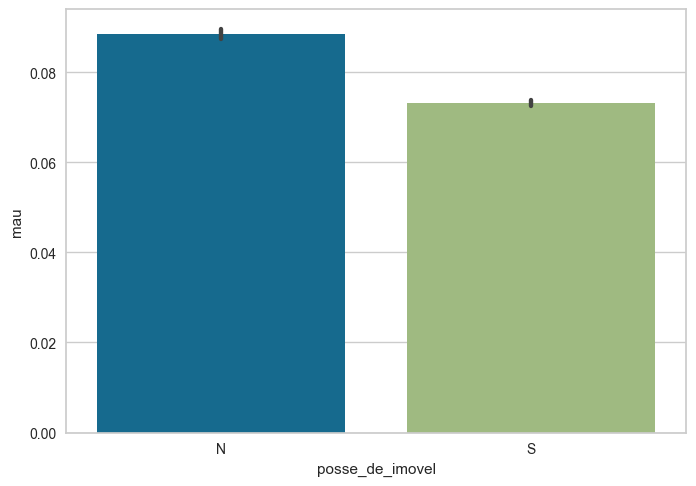

In [33]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=df)

<Axes: xlabel='tipo_renda', ylabel='mau'>

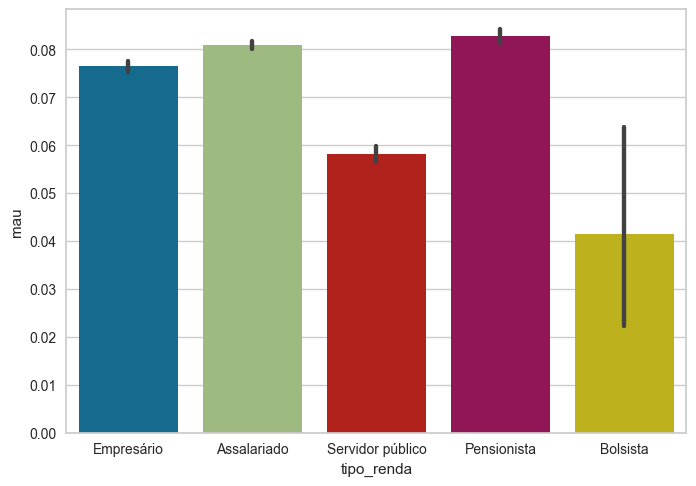

In [34]:
sns.barplot(x='tipo_renda', y = 'mau', data=df)

[Text(0, 0, 'Médio'),
 Text(1, 0, 'Superior incompleto'),
 Text(2, 0, 'Superior completo'),
 Text(3, 0, 'Fundamental'),
 Text(4, 0, 'Pós graduação')]

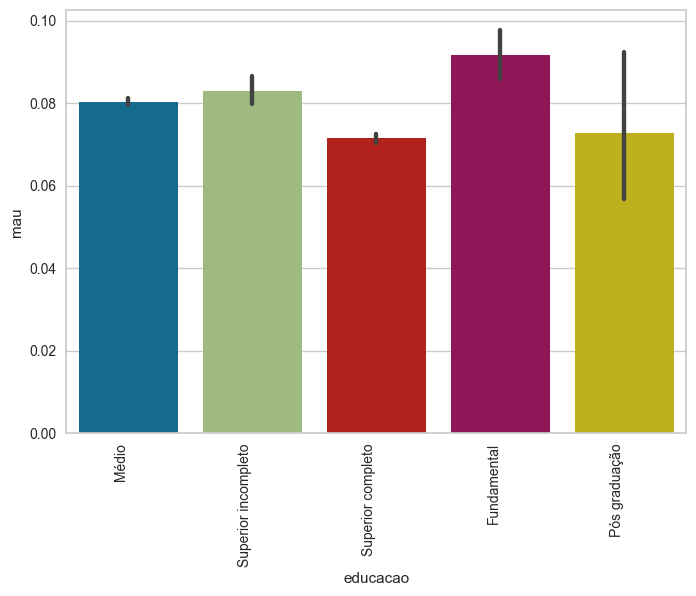

In [35]:
educacao = sns.barplot(x='educacao', y = 'mau', data=df)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: xlabel='estado_civil', ylabel='mau'>

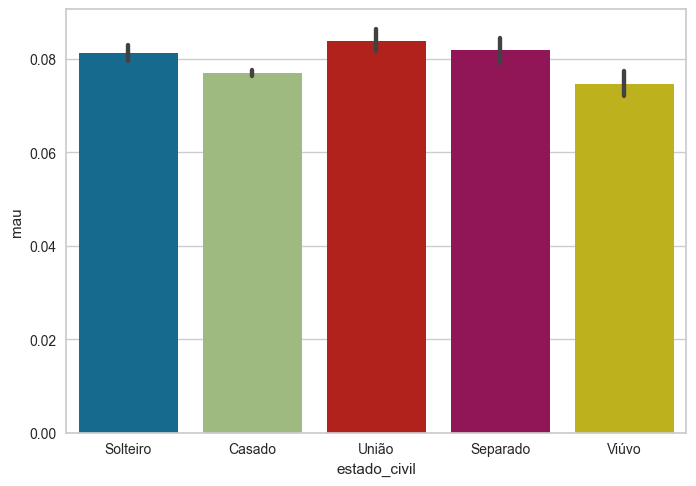

In [36]:
sns.barplot(x='estado_civil', y = 'mau', data=df)

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Comunitário'),
 Text(4, 0, 'Governamental'),
 Text(5, 0, 'Estúdio')]

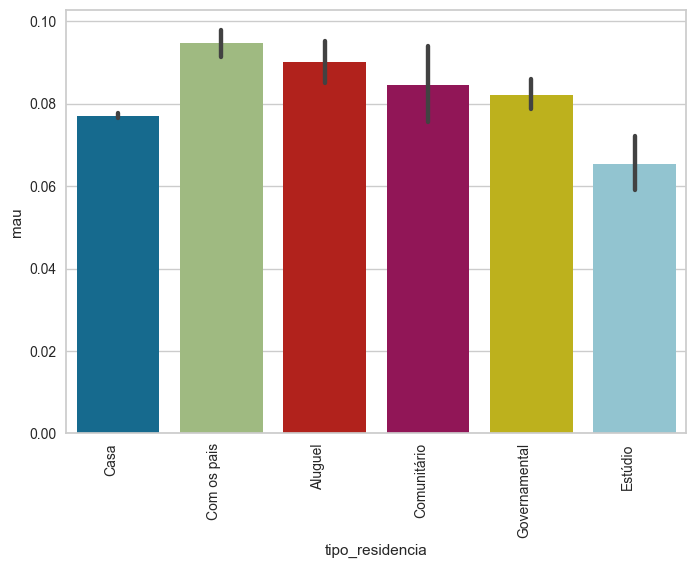

In [37]:
tipo_residencia = sns.barplot(x='tipo_residencia', y = 'mau', data=df)    
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [38]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [39]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [40]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [41]:
df['mau'] = df.mau.astype('int64')

In [42]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [43]:
iv_sexo = IV(df.sexo, df.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [44]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [45]:
var='idade'
IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)

0.01796842289500074

In [46]:
for var in metadados[metadados.variavel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)
        
        
metadados

,dtype,valores_unicos,variavel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [47]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

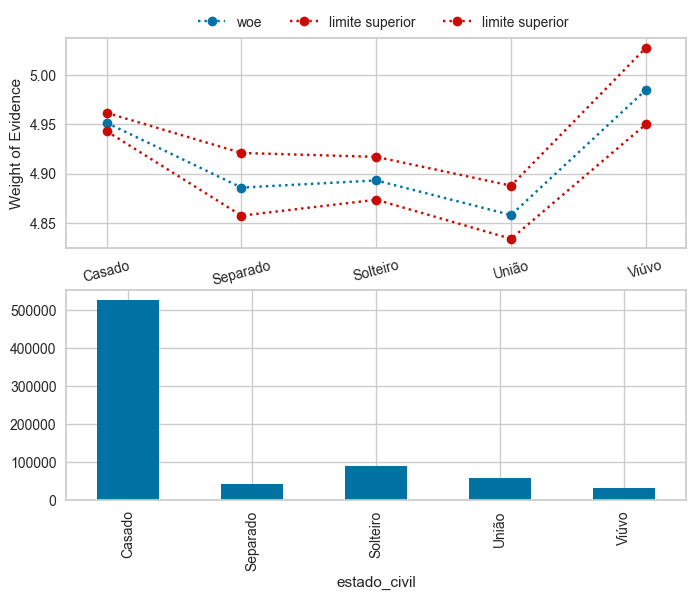

In [48]:
biv_discreta('estado_civil', df);

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,354527,354527,0.919083,Assalariado,385740,0.000439,0.919943,0.918222,2.429950,2.441578,2.420306,4.897138,4.908766,4.887495
Bols./SerPubl,61497,61497,0.942006,Bols./SerPubl,65283,0.000915,0.943799,0.940213,2.787678,2.820985,2.759132,5.254866,5.288173,5.226320
Empresário,159508,159508,0.923549,Empresário,172712,0.000639,0.924802,0.922296,2.491574,2.509458,2.476671,4.958762,4.976646,4.943859
Pensionista,115825,115825,0.917317,Pensionista,126265,0.000775,0.918836,0.915798,2.406436,2.426634,2.389885,4.873624,4.893822,4.857073


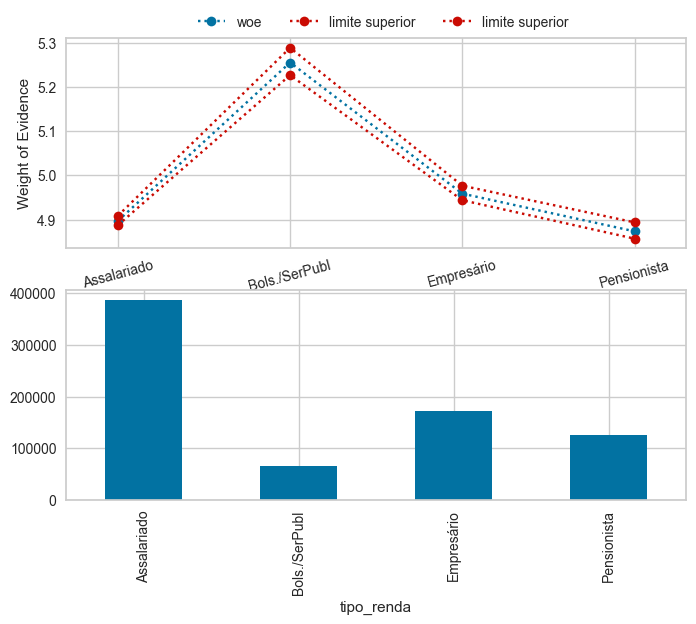

In [49]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', df2)

In [50]:
IV(df2.tipo_renda, df.mau)

0.009314630323182816

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,7789,7789,0.908338,Fundamental,8575,0.003116,0.914446,0.902230,2.293511,2.369175,2.235701,4.760699,4.836363,4.702889
Médio,466106,466106,0.919639,Médio,506836,0.000382,0.920387,0.918890,2.437448,2.447619,2.428992,4.904636,4.914807,4.896180
Sup.Compl/PosGra,190437,190437,0.928427,Sup.Compl/PosGra,205118,0.000569,0.929542,0.927311,2.562767,2.579677,2.548502,5.029955,5.046865,5.015690
Superior incompleto,27025,27025,0.917003,Superior incompleto,29471,0.001607,0.920153,0.913853,2.402308,2.444427,2.368489,4.869496,4.911615,4.835677


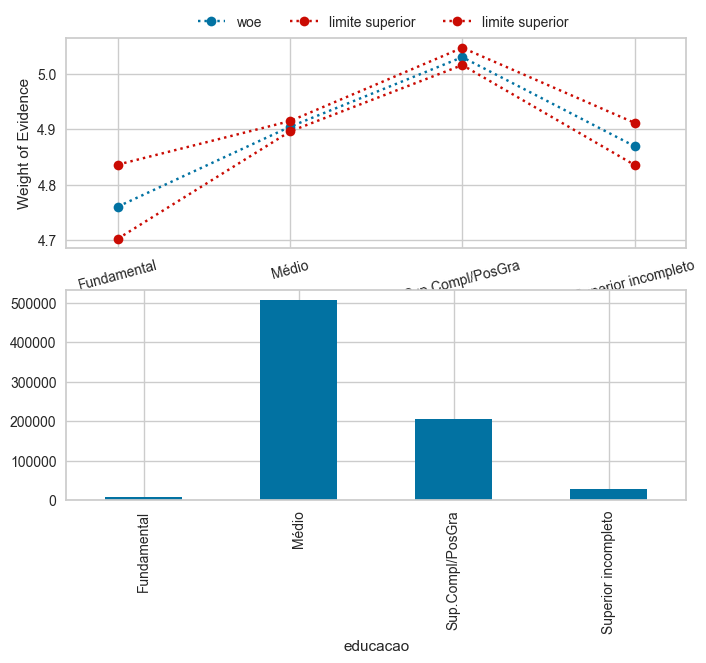

In [51]:
df2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', df2)

0.0023941390471014087

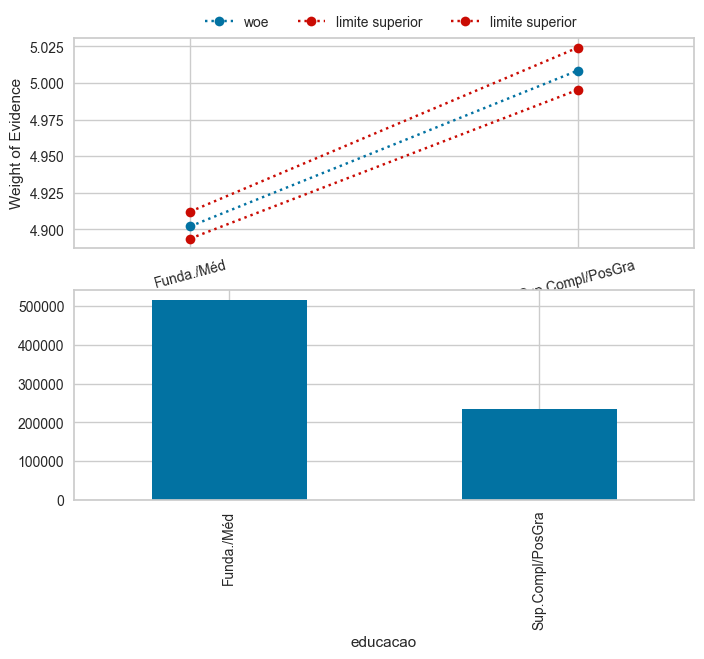

In [52]:
df2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [53]:
pd.crosstab(df['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [54]:
!pip install pycaret

In [64]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [65]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [66]:
# 1. Substituição de nulos
def substituir_nulos(df):
    df.dropna(inplace=True)
    return df

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [67]:
def remover_outliers(df):
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return df

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [68]:
def criar_dummies(df):
    return pd.get_dummies(df, drop_first=True)

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [69]:
def selecionar_variaveis(X, y, n_features=8):
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_features:]  # Seleciona os índices das n_features mais importantes
    selected_columns = X.columns[indices]  # Nomes das variáveis selecionadas
    return X[selected_columns], selected_columns

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [70]:
def aplicar_pca(X, n_components=5):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [73]:
def preprocessamento(df):
    y = df['mau']
    X = df.drop(columns=['mau', 'index', 'data_ref'])
    
    # Aplicar as funções de pré-processamento
    df = substituir_nulos(df)
    df = remover_outliers(df)
    X = criar_dummies(X)
    
    # Verificação de consistência
    if X.shape[0] != y.shape[0]:
        raise ValueError("Número de amostras em X e y não coincide após pré-processamento")
    
    # Seleção de variáveis
    X_selecionado, colunas_selecionadas = selecionar_variaveis(X, y, n_features=8)
    
    # Verificação de consistência
    if X_selecionado.shape[0] != y.shape[0]:
        raise ValueError("Número de amostras em X e y não coincide após seleção de variáveis")
    
    # Aplicação de PCA
    X_pca = aplicar_pca(X_selecionado, n_components=5)
    
    # Adicionar a variável alvo de volta
    X_pca['mau'] = y.reset_index(drop=True)
    
    return X_pca, colunas_selecionadas

In [74]:

df_processado, variaveis_selecionadas = preprocessamento(df)
print(df_processado.head())
print("Variáveis selecionadas:", variaveis_selecionadas)

            PC1        PC2       PC3       PC4       PC5    mau
0 -23296.915975  -2.769966  0.730149 -1.303403 -0.527573  False
1 -22632.116234   5.607016  0.938488 -0.733795  0.189800  False
2 -24230.016484  10.616798  3.944145  1.903492 -0.786023  False
3 -12091.135529 -14.553057 -1.795215 -0.131585 -0.404075  False
4 -22921.226167   8.426696 -3.863560 -1.685813  0.200477  False
Variáveis selecionadas: Index(['sexo_M', 'qtd_filhos', 'tipo_renda_Empresário', 'posse_de_veiculo_S',
       'qt_pessoas_residencia', 'idade', 'tempo_emprego', 'renda'],
      dtype='object')


# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [75]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [76]:
dataset = df.sample(50000)

In [77]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [78]:
data = dataset.sample(frac=0.95, random_state=222)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 13)


In [79]:
data.qtd_filhos = data.qtd_filhos.astype(float) #forçando a variável qnt de filhos como numérica

In [80]:
from pycaret.classification import *

In [81]:
clf = setup(data = data, target = 'mau', session_id=123)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(47500, 13)"
4,Transformed data shape,"(47500, 30)"
5,Transformed train set shape,"(33250, 30)"
6,Transformed test set shape,"(14250, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,17.1%


In [82]:
lightgbm = create_model('lightgbm', class_weight='balanced')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7140,0.7553,0.6426,0.1647,0.2622,0.1559,0.2119
1,0.7194,0.7360,0.6160,0.1630,0.2578,0.1516,0.2030
2,0.7140,0.7713,0.6806,0.1711,0.2735,0.1684,0.2310
3,0.7200,0.7924,0.7034,0.1782,0.2844,0.1810,0.2474
4,0.7242,0.7904,0.7110,0.1819,0.2897,0.1873,0.2548
5,0.7284,0.7793,0.6616,0.1761,0.2782,0.1751,0.2337
6,0.7077,0.7690,0.6920,0.1696,0.2725,0.1666,0.2315
7,0.7173,0.7703,0.6768,0.1723,0.2747,0.1700,0.2319
8,0.7068,0.7776,0.6932,0.1699,0.2729,0.1666,0.2317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7531,0.7292,0.5361,0.1679,0.2557,0.1537,0.1912
1,0.7395,0.7218,0.5171,0.1554,0.2390,0.1336,0.1690
2,0.7504,0.7326,0.5361,0.1661,0.2536,0.1511,0.1887
3,0.7756,0.7563,0.5475,0.1868,0.2785,0.1820,0.2192
4,0.7549,0.7344,0.5323,0.1683,0.2557,0.1540,0.1909
5,0.7675,0.7468,0.5209,0.1747,0.2617,0.1625,0.1969
6,0.7615,0.7354,0.5399,0.1744,0.2637,0.1637,0.2011
7,0.7570,0.7311,0.5513,0.1737,0.2641,0.1635,0.2029
8,0.7519,0.7323,0.5227,0.1649,0.2507,0.1478,0.1834


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


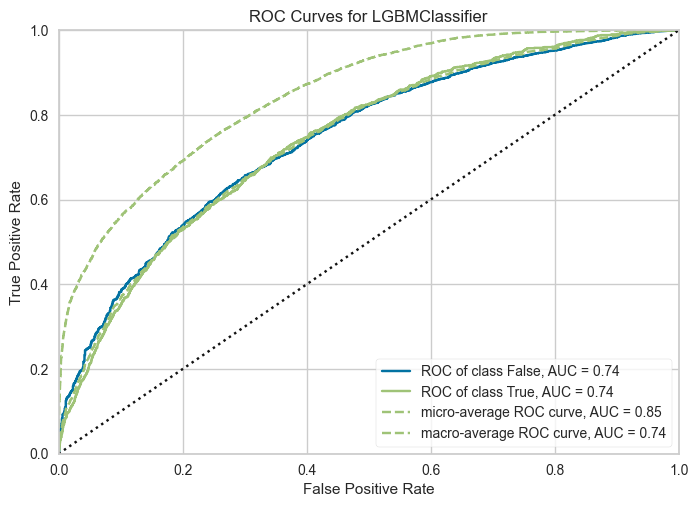

In [84]:
plot_model(tuned_lightgbm, plot='auc')

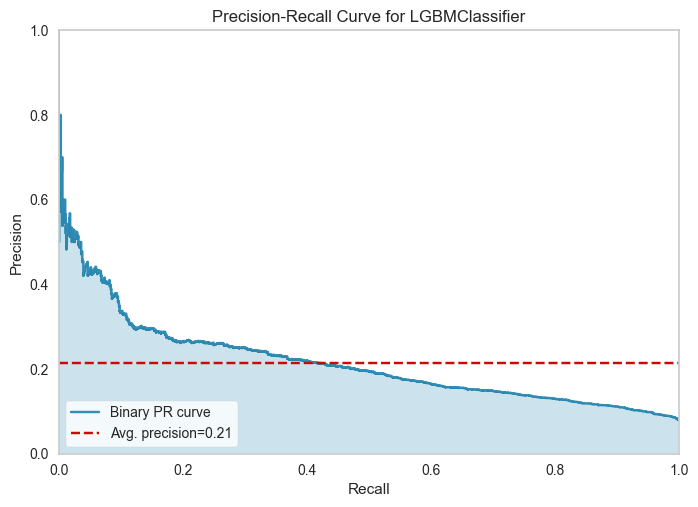

In [85]:
plot_model(tuned_lightgbm, plot = 'pr')

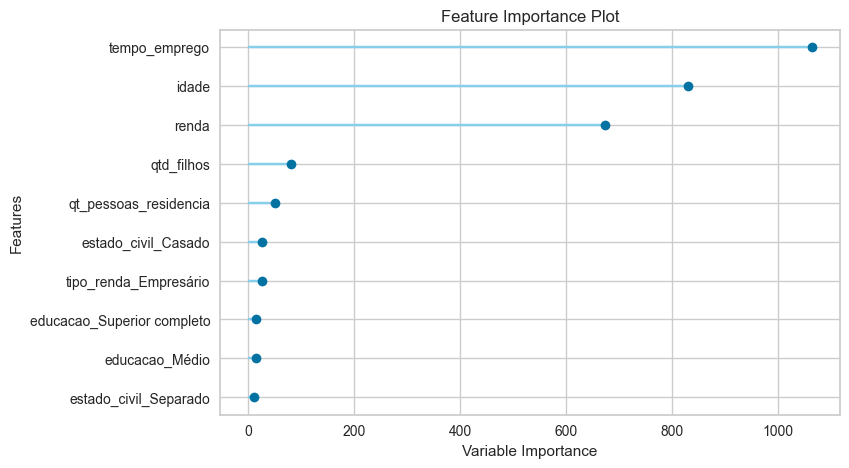

In [86]:
plot_model(tuned_lightgbm, plot='feature')

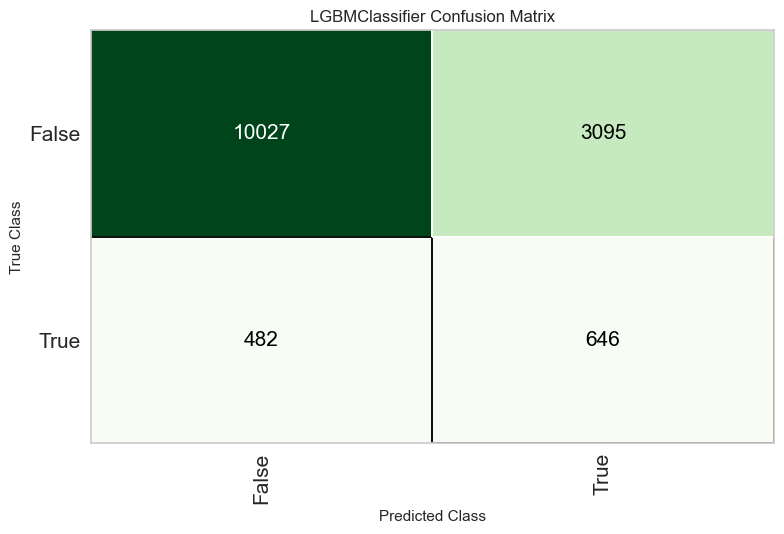

In [87]:

plot_model(tuned_lightgbm, plot='confusion_matrix')

In [90]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7490,0.7428,0.5727,0.1727,0.2654,0.1636,0.2067


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
29013,F,N,S,2.0,Assalariado,Superior completo,Casado,Casa,53,30.120548,4.0,518207.000000,False,0,0.9996
44631,F,S,N,0.0,Empresário,Superior completo,Casado,Casa,37,1.605479,2.0,1645.079956,False,1,0.7706
46015,F,N,N,0.0,Empresário,Médio,Casado,Casa,43,24.736986,2.0,45460.000000,False,0,0.9963
856,M,N,S,0.0,Assalariado,Superior completo,Casado,Casa,40,5.643836,2.0,18273.939453,False,0,0.6562
3413,F,N,N,0.0,Assalariado,Médio,Casado,Casa,50,5.887671,2.0,2594.290039,False,1,0.6077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37241,M,S,N,3.0,Assalariado,Médio,Casado,Casa,27,9.520548,5.0,28253.880859,False,0,0.9951
9800,M,N,N,1.0,Assalariado,Médio,Casado,Casa,44,3.994521,3.0,7439.939941,False,1,0.5086
39640,M,S,N,1.0,Servidor público,Médio,Casado,Casa,59,11.895890,3.0,2155.959961,True,0,0.8036
20335,F,N,S,0.0,Pensionista,Médio,União,Casa,55,NaN,2.0,24418.839844,False,0,0.8759


In [91]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [92]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWra...
                                boosting_type='gbdt', class_weight='balanced',
                     

In [93]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7172,0.7347,0.5976,0.1365,0.2222,0.1260,0.1779


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
0,F,S,S,0,Assalariado,Médio,Casado,Casa,46,19.901369,2.0,59330.050781,False,0,0.9958
1,F,S,S,0,Empresário,Médio,Casado,Casa,28,2.010959,2.0,2015.420044,False,1,0.7632
2,M,N,N,1,Servidor público,Superior incompleto,Casado,Com os pais,33,1.575342,3.0,6195.819824,False,0,0.5078
3,F,N,N,0,Servidor público,Médio,Casado,Comunitário,49,20.468493,2.0,27301.550781,False,0,0.9845
4,F,N,N,0,Assalariado,Médio,Casado,Governamental,52,7.032876,2.0,10422.910156,False,0,0.9195


In [95]:
save_model(final_lightgbm,'Final LightGBM Model 05Mar2025')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Transformation Pipeline and Model Successfully Saved


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\alima\anaconda3\Lib\logging\__init__.py", line 1114, in emit
    self.flush()
  File "C:\Users\alima\anaconda3\Lib\logging\__init__.py", line 1094, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\alima\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\alima\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\alima\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\alima\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forev

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                                 boosting_type='gbdt', class_weight='balanced',
      